In [4]:
import pandas as pd
import gc, glob, os, datetime, dateutil

In [110]:
wifi_locations = pd.read_csv('/Users/tanshi/SIP2019/dataset_tables/wifi_location.csv', index_col=False)

In [111]:
#mini goals:
#divide each person into time 

locations = []
for x in wifi_locations['location']:
    if (not x in locations):
        locations.append(x)
        
#print locations

In [113]:
print len(locations)
print locations[0]

9036
in[east-wheelock]


In [5]:
#9036 locations
#for each hour period, if in specific location, add count for that location
#try with one singular person 
#find where 8:00 starts --> sublist
#go through sublist, add a tic for the first location
#as move only through sublist, if location is same do nothing; else, add tic to the new location
#once finished through sublist, create new/replace with new sublist from 8:00 to 9:00
#continue until reach 4:00

#repeat for all 60 user ids



#dictionary of location and indices
'''TRIAL- IGNORE

loc_dict = {}
for x in locations:
    loc_dict.update({x : 0})
#print loc_dict

y = 0
time_contd = True

from datetime import datetime

print wifi_locations['time'][0]
datetime_object = datetime.strptime(wifi_locations['time'][0], "%Y-%m-%d %H:%M:%S")

print datetime_object.hour

#repeat for other 60
more_ids = True
curr_id = 0

while(more_ids):
    while(time_contd):
        if y == 0:
            for i in range(len(locations)):
                if (wifi_locations['location'][0] == locations[i]):
                    loc_dict[locations[i]] += 1
            y+=1
        else :
            if (wifi_locations['location'][y] != wifi_locations['location'][y-1]):
                for i in range(len(locations)):
                    if (wifi_locations['location'][y] == locations[i]):
                        loc_dict[locations[i]] += 1
            datetime_object1 = datetime.strptime(wifi_locations['time'][y], "%Y-%m-%d %H:%M:%S")
            datetime_object2 = datetime.strptime(wifi_locations['time'][y-1], "%Y-%m-%d %H:%M:%S")
            if (datetime_object1.hour != datetime_object2.hour):
                time_contd = False
            y+=1
    #one time period elapsed, moving on to next id
    curr_id += 1
    y = 0
    
        
print loc_dict

#repeat for all day 7-8, 8-9, 9-10, 10-11, 11-12, 12-1, 1-2, 2-3, 3-4 '''

'TRIAL- IGNORE\n\nloc_dict = {}\nfor x in locations:\n    loc_dict.update({x : 0})\n#print loc_dict\n\ny = 0\ntime_contd = True\n\nfrom datetime import datetime\n\nprint wifi_locations[\'time\'][0]\ndatetime_object = datetime.strptime(wifi_locations[\'time\'][0], "%Y-%m-%d %H:%M:%S")\n\nprint datetime_object.hour\n\n#repeat for other 60\nmore_ids = True\ncurr_id = 0\n\nwhile(more_ids):\n    while(time_contd):\n        if y == 0:\n            for i in range(len(locations)):\n                if (wifi_locations[\'location\'][0] == locations[i]):\n                    loc_dict[locations[i]] += 1\n            y+=1\n        else :\n            if (wifi_locations[\'location\'][y] != wifi_locations[\'location\'][y-1]):\n                for i in range(len(locations)):\n                    if (wifi_locations[\'location\'][y] == locations[i]):\n                        loc_dict[locations[i]] += 1\n            datetime_object1 = datetime.strptime(wifi_locations[\'time\'][y], "%Y-%m-%d %H:%M:%S")\n  

In [49]:
os.chdir('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation')
filelist = []
for files in glob.glob("*.csv"):
    filelist.append(files)
print len(filelist)

45


In [6]:
for x in filelist:
    my_curr = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+x, index_col=False)
    my_curr['time'] = my_curr['time'] - 14400
    my_curr['timestamp'] = pd.to_datetime(my_curr['time'], unit = 's')
    my_curr.to_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+x, index = False)
    #print my_curr['timestamp']

In [40]:
print len(filelist)

49


In [14]:
#ONE HOUR FOR ALL UIDS CURRENTLY WORKING
loc_dict = {}
for x in locations:
    loc_dict.update({x : 0})
    
file_index = 0
#curr = filelist[file_index]
curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u01.csv', index_col=False)
#print curr_file
#curr_file['time'] = curr_file['time'] - 14400
#curr_file['time'] = pd.to_datetime(curr_file['time'], unit = 's')
#print(curr_file['time'])

more_ids = True
curr_id = 0
y = 0
time_contd = True


    

while(more_ids):
    #print curr_id
    while(time_contd):
        #print y
        if y == 0:
            for i in range(len(locations)):
                if (curr_file['location'][0] == locations[i]):
                    loc_dict[locations[i]] += 1
            y+=1
        else :
            if (curr_file['location'][y] != curr_file['location'][y-1]):
                for i in range(len(locations)):
                    if (curr_file['location'][y] == locations[i]):
                        loc_dict[locations[i]] += 1
            datetime_object1 = datetime.strptime(curr_file['timestamp'][y], "%Y-%m-%d %H:%M:%S")
            datetime_object2 = datetime.strptime(curr_file['timestamp'][y-1], "%Y-%m-%d %H:%M:%S")
            if (datetime_object1.hour != datetime_object2.hour):
                time_contd = False
            y+=1
    #one time period elapsed, moving on to next id
    y = 0
    time_contd = True
    if (curr_id == 48):
        more_ids = False
    else:
        curr_id += 1
        file_index+=1
        dir = filelist[file_index]
        curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+dir, index_col=False)
#print loc_dict.values()

In [15]:
for key in loc_dict:
    if (loc_dict[key] != 0):
        print (key, loc_dict[key])

('near[lsb; vail; dana-library; ]', 1)
('near[parkhurst; sanborn; blunt_alumni_center; ]', 1)
('near[steele; college-street; library-default-services; ]', 1)
('near[north-main; kemeny; moore; ]', 1)
('near[sanborn; baker-berry; kemeny; ]', 1)
('near[websterhall; wentworth; dartmouth_hall; ]', 1)
('in[fayerweather]', 1)
('in[batrlett]', 1)
('in[massrow]', 5)
('in[north-main]', 4)
('near[mcnutt; robinson; parkhurst; ]', 1)
('near[53_commons; hopkins; robinson; ]', 1)
('near[wheeler; steele; ]', 2)
('near[53_commons; fairbanks; massrow; ]', 1)
('in[kemeny]', 5)
('near[butterfield; chasehall; Tuck_hall; ]', 1)
('in[sport-venues-press]', 1)
('near[robinson; massrow; baker-berry; ]', 1)
('near[kemeny; baker-berry; north-main; ]', 1)
('near[college-street; kemeny; baker-berry; ]', 1)
('near[batrlett; hopkins; carson-tech_services; ]', 1)
('near[topliff; north-park; sport-venues; ]', 1)
('in[gile]', 1)
('near[dartmouth_hall; baker-berry; thornton; ]', 1)
('near[steele; college-street; baker-be

In [22]:
#check crowded
#different levels of crowding: heavy, slightly, mostly abandoned, empty
#0 = empty; 1-10: mostly abandoned; 11-20: slightly; 21-49: crowded

crowd_dict = {}
for x in locations:
    crowd_dict.update({x : ""})
    
for key in loc_dict:
    if (loc_dict[key] >= 21):
        crowd_dict[key] = "Heavy"
    elif (loc_dict[key] >= 11):
        crowd_dict[key] = "Slight"
    elif (loc_dict[key] >= 1):
        crowd_dict[key] = "Mostly Abandoned"
    else:
        crowd_dict[key] = "Empty"
    if (crowd_dict[key] != "Empty"):
        print (key, crowd_dict[key])

NameError: name 'locations' is not defined

In [78]:
import pymysql

dbServerName = "127.0.0.1"
dbUser = "root"
dbPassword = "mypassword"
dbName = "db1"
charSet = "utf8mb4"
cusrorType = pymysql.cursors.DictCursor

connectionObject = pymysql.connect(host=dbServerName, user=dbUser, db=dbName, password=dbPassword, charset=charSet,cursorclass=cusrorType)

try:
    # Create a cursor object
    cursorObject = connectionObject.cursor()                                     

    

    # SQL query string
    sqlQuery = "show tables"   

    # Execute the sqlQuery
    cursorObject.execute(sqlQuery)

    #Fetch all the rows
    rows = cursorObject.fetchall()

    for row in rows:
        print(row)
        
    sqlQuery = "SELECT * from table1"
    cursorObject.execute(sqlQuery)

    
    rows = cursorObject.fetchall()

    for row in rows:
        print(row)

except Exception as e:
    print("Exeception occured:{}".format(e))
    
finally:
    connectionObject.close()

{u'Tables_in_db1': u'table1'}
{u'n_id': 5, u'name': u'John'}
{u'n_id': 25, u'name': u'Bob'}


In [58]:
curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u01.csv', index_col=False)
print curr_file['timestamp']

curr_file['timestamp'][0].hour


0        2013-03-26 20:03:29
1        2013-03-26 20:23:29
2        2013-03-26 20:38:22
3        2013-03-26 20:39:23
4        2013-03-26 20:40:23
5        2013-03-26 20:43:29
6        2013-03-26 20:45:08
7        2013-03-26 20:49:53
8        2013-03-26 20:54:38
9        2013-03-26 20:59:23
10       2013-03-26 21:03:29
11       2013-03-26 21:08:53
12       2013-03-26 21:11:06
13       2013-03-26 21:23:29
14       2013-03-26 21:28:40
15       2013-03-26 21:33:26
16       2013-03-26 21:38:11
17       2013-03-26 21:42:47
18       2013-03-26 21:43:29
19       2013-03-26 21:47:32
20       2013-03-26 21:52:17
21       2013-03-26 21:54:06
22       2013-03-26 22:03:29
23       2013-03-26 22:07:19
24       2013-03-26 22:12:05
25       2013-03-26 22:16:50
26       2013-03-26 22:21:35
27       2013-03-26 22:23:29
28       2013-03-26 22:26:20
29       2013-03-26 22:31:05
                ...         
20119    2013-05-29 05:47:52
20120    2013-05-29 05:48:12
20121    2013-05-29 05:48:32
20122    2013-

AttributeError: 'str' object has no attribute 'hour'

In [71]:
from datetime import datetime


curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=False)

start_indices = []
more_files = True
file_index = 1

while (more_files):
    for i in range(len(curr_file)):
        datetimeObj = datetime.strptime(curr_file['timestamp'][i], "%Y-%m-%d %H:%M:%S")
        if (datetimeObj.day == 28):
            if (datetimeObj.hour == 13):
                start_indices.append(i)
                break
    if (len(start_indices) == 45):
        more_files = False
        break
    else:
        dir = filelist[file_index]
        curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+dir, index_col=False)
        file_index += 1
        
        
print start_indices

#TAKE OUT 12, 39, 42, 44



[492, 1337, 885, 3168, 860, 514, 2593, 705, 574, 10034, 0, 1140, 642, 378, 385, 632, 302, 733, 2736, 444, 864, 781, 1444, 1352, 8595, 962, 470, 1200, 215, 121, 231, 5211, 14575, 17310, 52, 86, 38, 341, 7562, 1745, 647, 1374, 2812, 912, 2906]


In [66]:
#adapt for all hours correctly

loc_dict = {}
for x in locations:
    loc_dict.update({x : 0})
    
file_index = 0
#curr = filelist[file_index]
curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=False)
#print curr_file
#curr_file['time'] = curr_file['time'] - 14400
#curr_file['time'] = pd.to_datetime(curr_file['time'], unit = 's')
#print(curr_file['time'])


more_ids = True
curr_id = 0
y = start_indices[0]
time_contd = True
more_hours = True
index = 0
loc_dict_list = []
place_holder = 0
hour = 0


    
from datetime import datetime

while(more_hours): 
    while(more_ids):
        #print curr_id
        while(time_contd):
            #if at beginning of time period
            if y == start_indices[file_index]:
                for i in range(len(locations)):
                    if (curr_file['location'][y] == locations[i]):
                        loc_dict[locations[i]] += 1
                y+=1
            else :
                #check if still in the same time period
                datetime_object1 = datetime.strptime(curr_file['timestamp'][y], "%Y-%m-%d %H:%M:%S")
                datetime_object2 = datetime.strptime(curr_file['timestamp'][y-1], "%Y-%m-%d %H:%M:%S")
                if (datetime_object1.hour != datetime_object2.hour):
                    time_contd = False
                else:
                    #if user moves to new location within the period
                    if (curr_file['location'][y] != curr_file['location'][y-1]):
                        for i in range(len(locations)):
                            if (curr_file['location'][y] == locations[i]):
                                loc_dict[locations[i]] += 1
                    y+=1
        #one time period elapsed, moving on to next id            
        time_contd = True
        #if all uids checked for the time period, move on to next time period
        if (curr_id == 44):
            curr_id = 0
            file_index = 0
            print hour
            hour += 1
            #index = place_holder
            y = start_indices[file_index]
            #add location and user dictionary for the period into list
            loc_dict_list.append(loc_dict)
            #reset dictionary to prepare for next time period
            loc_dict = {x: 0 for x in loc_dict}
            #if all time periods elapsed, stop
            if (hour == 11):
                more_hours = False
                more_ids = False
        else:
            #stay in same time period, move on to next uid
            start_indices[file_index] = y
            y = start_indices[file_index]
            curr_id += 1
            file_index+=1
            dir = filelist[file_index]
            curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+dir, index_col=False)
#print loc_dict.values()

0
1
2
3
4
5
6
7
8
9
10


In [70]:
'''#adapt for all hours

loc_dict = {}
for x in locations:
    loc_dict.update({x : 0})
    
file_index = 0
#curr = filelist[file_index]
curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=False)
#print curr_file
#curr_file['time'] = curr_file['time'] - 14400
#curr_file['time'] = pd.to_datetime(curr_file['time'], unit = 's')
#print(curr_file['time'])

more_ids = True
curr_id = 0
y = 0
time_contd = True
more_hours = True
index = 0
loc_dict_list = []
place_holder = 0
hour = 0


    
    
from datetime import datetime

while(more_hours): 
    while(more_ids):
        #print curr_id
        while(time_contd):
            #if at beginning of time period
            if y == index:
                for i in range(len(locations)):
                    if (curr_file['location'][y] == locations[i]):
                        loc_dict[locations[i]] += 1
                y+=1
            else :
                #check if still in the same time period
                datetime_object1 = datetime.strptime(curr_file['timestamp'][y], "%Y-%m-%d %H:%M:%S")
                datetime_object2 = datetime.strptime(curr_file['timestamp'][y-1], "%Y-%m-%d %H:%M:%S")
                if (datetime_object1.hour != datetime_object2.hour):
                    time_contd = False
                else:
                    #if user moves to new location within the period
                    if (curr_file['location'][y] != curr_file['location'][y-1]):
                        for i in range(len(locations)):
                            if (curr_file['location'][y] == locations[i]):
                                loc_dict[locations[i]] += 1
                    y+=1
        #one time period elapsed, moving on to next id
        place_holder = y
        y = index
        time_contd = True
        #if all uids checked for the time period, move on to next time period
        if (curr_id == 48):
            curr_id = 0
            file_index = 0
            print hour
            hour += 1
            index = place_holder
            y = index
            #add location and user dictionary for the period into list
            loc_dict_list.append(loc_dict)
            #reset dictionary to prepare for next time period
            loc_dict = {x: 0 for x in loc_dict}
            #if all time periods elapsed, stop
            if (hour == 19):
                more_hours = False
                more_ids = False
        else:
            #stay in same time period, move on to next uid
            curr_id += 1
            file_index+=1
            dir = filelist[file_index]
            curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+dir, index_col=False)
#print loc_dict.values()'''

'#adapt for all hours\n\nloc_dict = {}\nfor x in locations:\n    loc_dict.update({x : 0})\n    \nfile_index = 0\n#curr = filelist[file_index]\ncurr_file = pd.read_csv(\'/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv\', index_col=False)\n#print curr_file\n#curr_file[\'time\'] = curr_file[\'time\'] - 14400\n#curr_file[\'time\'] = pd.to_datetime(curr_file[\'time\'], unit = \'s\')\n#print(curr_file[\'time\'])\n\nmore_ids = True\ncurr_id = 0\ny = 0\ntime_contd = True\nmore_hours = True\nindex = 0\nloc_dict_list = []\nplace_holder = 0\nhour = 0\n\n\n    \n    \nfrom datetime import datetime\n\nwhile(more_hours): \n    while(more_ids):\n        #print curr_id\n        while(time_contd):\n            #if at beginning of time period\n            if y == index:\n                for i in range(len(locations)):\n                    if (curr_file[\'location\'][y] == locations[i]):\n                        loc_dict[locations[i]] += 1\n                y+=1\n         

In [230]:
my_loc_dict = loc_dict_list[10]
#print my_loc_dict

for key in my_loc_dict:
    if (my_loc_dict[key] != 0):
        print (key, my_loc_dict[key])

('near[woodward; east-wheelock; smith; ]', 1)
('in[hanoverpsych]', 1)
('near[carpenterhall; parkhurst; massrow; ]', 1)
('in[robinson]', 1)
('near[7-lebanon; vac; HanoverInn; ]', 1)
('near[batrlett; thornton; sport-venues-press; ]', 1)
('near[butterfield; hopkins; ]', 1)
('near[butterfield; murdough; cummings; ]', 1)
('in[baker-berry]', 3)
('near[dana-library; ropeferry; mclaughlin; ]', 1)
('near[massrow; parkhurst; fairbanks; ]', 1)
('near[moore; kemeny; college-street; ]', 1)
('near[baker-berry; websterhall; ]', 1)
('near[parkhurst; blunt_alumni_center; baker-berry; ]', 1)
('near[east-wheelock; HanoverInn; ]', 1)
('in[north-main]', 5)
('near[hitchcock; massrow; blunt_alumni_center; ]', 1)
('near[butterfield; hopkins; silsby-rocky; ]', 1)
('near[butterfield; hopkins; fahey-mclane; ]', 1)
('near[mclaughlin; sudikoff; ropeferry; ]', 1)
('in[sport-venues-press]', 1)
('near[baker-berry; silsby-rocky; carpenterhall; ]', 1)
('near[carpenterhall; baker-berry; silsby-rocky; ]', 1)
('near[kemen

In [84]:
#check crowded
#different levels of crowding: heavy, slightly, mostly abandoned, empty
#0 = empty; 1-10: mostly abandoned; 11-20: slightly; 21-49: crowded

crowd_dict = {}
crowd_dict_list = []

for i in loc_dict_list:
    for x in locations:
        crowd_dict.update({x : ""})

    for key in crowd_dict:
        if (i[key] >= 21):
            crowd_dict[key] = "Heavy"
        elif (i[key] >= 11):
            crowd_dict[key] = "Slight"
        elif (i[key] >= 1):
            crowd_dict[key] = "Mostly Abandoned"
        else:
            crowd_dict[key] = "Empty"
            
    crowd_dict_list.append(crowd_dict)

In [89]:
print len(crowd_dict_list)
crowd = crowd_dict_list[7]

for key in crowd:
    if (crowd[key] != "Empty"):
        print (key, ":", crowd[key])

11
('in[hanoverpsych]', ':', 'Mostly Abandoned')
('near[woodward; east-wheelock; smith; ]', ':', 'Mostly Abandoned')
('near[carpenterhall; parkhurst; massrow; ]', ':', 'Mostly Abandoned')
('near[parkhurst; mcnutt; massrow; ]', ':', 'Mostly Abandoned')
('in[robinson]', ':', 'Mostly Abandoned')
('near[7-lebanon; vac; HanoverInn; ]', ':', 'Mostly Abandoned')
('near[batrlett; thornton; sport-venues-press; ]', ':', 'Mostly Abandoned')
('near[butterfield; hopkins; ]', ':', 'Mostly Abandoned')
('near[hopkins; baker-berry; robinson; ]', ':', 'Mostly Abandoned')
('near[butterfield; murdough; cummings; ]', ':', 'Mostly Abandoned')
('near[dana-library; ropeferry; mclaughlin; ]', ':', 'Mostly Abandoned')
('near[massrow; parkhurst; fairbanks; ]', ':', 'Mostly Abandoned')
('near[moore; kemeny; college-street; ]', ':', 'Mostly Abandoned')
('near[baker-berry; websterhall; ]', ':', 'Mostly Abandoned')
('near[parkhurst; blunt_alumni_center; baker-berry; ]', ':', 'Mostly Abandoned')
('near[east-wheelock;

In [164]:
import pymysql

dbServerName = "127.0.0.1"
dbUser = "root"
dbPassword = "mypassword"
dbName = "db1"
charSet = "utf8mb4"
cusrorType = pymysql.cursors.DictCursor

connectionObject = pymysql.connect(host=dbServerName, user=dbUser, db=dbName, password=dbPassword, charset=charSet,cursorclass=cusrorType)

try:
    # Create a cursor object
    cursorObject = connectionObject.cursor()                                     

    

    # SQL query string
    sqlQuery = "show tables"   

    # Execute the sqlQuery
    cursorObject.execute(sqlQuery)

    #Fetch all the rows
    rows = cursorObject.fetchall()

    for row in rows:
        print(row)
        
    #sqlQuery = "TRUNCATE TABLE studentData";
    #cursorObject.execute(sqlQuery)
    
    ''''sqlQuery = "alter table studentData add column locations varchar (20);"
    cursorObject.execute(sqlQuery)
    
    sqlQuery = "ALTER TABLE studentData"
    
    cursorObject.execute(sqlQuery)
    
    sqlQuery = "ADD loc1 char(50);"
    cursorObject.execute(sqlQuery)
    
    sqlQuery = "INSERT INTO studentData (period, locations) VALUES ('1-2', 1)";
    cursorObject.execute(sqlQuery)'''
    
    sqlQuery = "SET @period = 1, @loc = 1, @count = 0";
    cursorObject.execute(sqlQuery)
    
    sqlQuery = "SET @index = 0";
    cursorObject.execute(sqlQuery)
    index = 0
    


    cursorObject.execute(sqlQuery)  
    
    period = 1
    
    for i in range(11):
        for j in locations:
            per = str(period)
            loc = str(loc_dict_list[i][j])
            crowd = str(crowd_dict_list[i][j])
            sqlQuery = "INSERT INTO studentData (period, locations, count, crowding) VALUES (per, j, loc, crowd)";
            cursorObject.execute(sqlQuery)
    
    
    '''for i in range(11):
        for j in locations:
            sqlQuery = "SET @count = loc_dict_list[@index][@locind]";
            cursorObject.execute(sqlQuery)
            sqlQuery = "SET @crowding = crowd_dict_list[@index][@locind]";
            cursorObject.execute(sqlQuery)
            sqlQuery = "INSERT INTO studentData (period, locations, count, crowding) VALUES (@period, @loc, @count, @crowding)";
            cursorObject.execute(sqlQuery)
            sqlQuery = "SET @loc = @loc + 1";
            cursorObject.execute(sqlQuery)
            sqlQuery = "SET @locind = locations[@loc-1]";
            cursorObject.execute(sqlQuery)    
            
        sqlQuery = "SET @loc = 1";
        cursorObject.execute(sqlQuery)
        sqlQuery = "SET @period = @period + 1";
        cursorObject.execute(sqlQuery)
        sqlQuery = "SET @index = @index + 1";
        cursorObject.execute(sqlQuery)    
        index += 1'''
        
    #sqlQuery = "alter table studentData add column count int";
    #cursorObject.execute(sqlQuery)
    
    
    #sqlQuery = "alter table studentData drop column loc1"
    #cursorObject.execute(sqlQuery)
       
    sqlQuery = "SELECT * from studentData"
    cursorObject.execute(sqlQuery)
    
    rows = cursorObject.fetchall()

    for row in rows:
        print(row)

except Exception as e:
    print("Exeception occured:{}".format(e))
    
finally:
    connectionObject.close()

{u'Tables_in_db1': u'studentData'}
{u'Tables_in_db1': u'table1'}
Exeception occured:(1054, u"Unknown column 'crowding' in 'field list'")


In [145]:
try:
    # Create a cursor object
    cursorObject = connectionObject.cursor()                                     

    sqlQuery = "DELETE from studentData [WHERE period = '9']";
    cursorObject.exexute(sqlQuery)

SyntaxError: invalid syntax (<ipython-input-145-ab50158529bc>, line 6)

In [413]:
import pymysql

dbServerName = "127.0.0.1"
dbUser = "root"
dbPassword = "mypassword"
dbName = "db1"
charSet = "utf8mb4"
cusrorType = pymysql.cursors.DictCursor

connectionObject = pymysql.connect(host=dbServerName, user=dbUser, db=dbName, password=dbPassword, charset=charSet,cursorclass=cusrorType)

try:
    # Create a cursor object
    cursorObject = connectionObject.cursor()                                     
    
    periodCount = 1
    
    for i in range(11):
        for j in locations:
            print j
            per = str(periodCount)
            loc = str(loc_dict_list[i][j])
            crowd = str(crowd_dict_list[i][j])
            #sqlQuery = "INSERT INTO studentLife (period, locations, count, crowding) VALUES ('$per', '$j', '$loc', '$crowd')";
            
            #sqlQuery = "INSERT INTO studentLife (period, locations, count, crowding) VALUES (\'" + per + "\', \'" + j + ", " + loc + ", " + crowd + ")";
            
            sqlQuery = "INSERT INTO studentLife (period, locations, count, crowding) VALUES (%s, %s, %s, %s)";
            
            values = (per, j, loc, crowd)
            
            print sqlQuery
            cursorObject.execute(sqlQuery, values)
            periodCount += 1
       
    sqlQuery = "SELECT * from studentLife"
    cursorObject.execute(sqlQuery)
    
    rows = cursorObject.fetchall()

    for row in rows:
        print(row)

except Exception as e:
    print("Exeception occured:{}".format(e))
    
finally:
    connectionObject.close()

[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


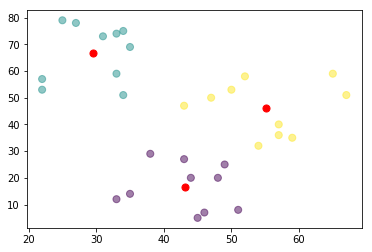

In [192]:
#can use location's crowding to predict where an individual could be
#based on how long uid is in a location, predict if in contact/percentage of entire student body in each location


#use clustering (one cluster = one location) --> classify all users into the clusters

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

1
1
1
1
1
1
1
2
1
8
1
1
1
1
1
1
1
1
1
6
1
1
1
1
1
1
2
1
1
1
1
1
1
1
3
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
4
1
5
1
1
1
1
1
2
1
1
1
3
4
1
2
1
1
1
1
1
3
1
1
1
[[ 1.08420217e-15  2.89004931e-15]
 [ 6.32911392e-03  1.22151899e+00]
 [ 1.38461538e+00 -4.16333634e-17]]


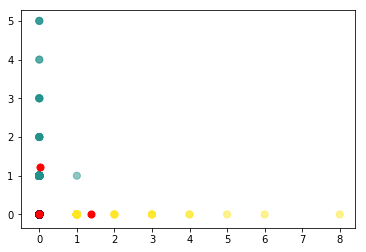

In [218]:
#apply k-means: 2 axes for locations at two different times (grouping based on movement?)
#48 points (x = location at 1:00, y = location at 2:00)

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import numpy as np

x = []
y = []

'''for key in loc_dict_list[0]:
    if (loc_dict_list[0][key] != 0):
        print loc_dict_list[8][key]
        if (loc_dict_list[8][key] != 0):
            x.append(loc_dict_list[0][i])
            y.append(loc_dict_list[8][i])'''
        
        
x = loc_dict_list[0].values()
y = loc_dict_list[8].values()


Data = np.array(list(zip(x, y)))
df = DataFrame(Data, columns=['x', 'y'])

for i in range(len(df['x'])):
    if (df['x'][i] != 0):
        print df['x'][i]

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)


plt.show()



In [232]:
import folium
from IPython.display import HTML

def display(m, height=300):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

/anaconda2/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [242]:
count = count = 0
for key in loc_dict_list[0]:
    if (loc_dict_list[0][key] == 0 & loc_dict_list[1][key] == 0 & loc_dict_list[2][key] == 0 & loc_dict_list[3][key] == 0):
        if (loc_dict_list[4][key] == 0 & loc_dict_list[5][key] == 0 & loc_dict_list[6][key] == 0 & loc_dict_list[7][key] == 0):
            if (loc_dict_list[8][key] == 0 & loc_dict_list[9][key] == 0 & loc_dict_list[10][key] == 0):
                count += 1

In [263]:
print ('not used:', count)
print ('used:', 9038-count)

myList = []
for i in range(11):
    for key in loc_dict_list[i]:
        if (loc_dict_list[i][key] >= 3) & (key not in myList):
            myList.append(key)
print myList
print len(myList)

myList.remove('in[newhamp]')
myList.remove('in[lsb]')
myList.remove('in[north-main]')
myList.remove('in[sport-venues-press]')
myList.remove('in[sport-venues]')

print myList
print len(myList)

('not used:', 8796)
('used:', 242)
['in[massrow]', 'near[massrow; parkhurst; ]', 'in[53_commons]', 'in[vac]', 'in[hopkins]', 'near[parkhurst; massrow; ]', 'in[sudikoff]', 'in[dana-library]', 'in[newhamp]', 'in[mclaughlin]', 'near[lsb; dana-library; vail; ]', 'in[baker-berry]', 'in[lsb]', 'in[north-main]', 'in[sport-venues-press]', 'in[sport-venues]', 'in[kemeny]', 'near[baker-berry; steele; ]', 'near[hopkins; vac; ]', 'in[east-wheelock]', 'near[vac; hopkins; ]', 'in[butterfield]', 'in[north-park]']
23
['in[massrow]', 'near[massrow; parkhurst; ]', 'in[53_commons]', 'in[vac]', 'in[hopkins]', 'near[parkhurst; massrow; ]', 'in[sudikoff]', 'in[dana-library]', 'in[mclaughlin]', 'near[lsb; dana-library; vail; ]', 'in[baker-berry]', 'in[kemeny]', 'near[baker-berry; steele; ]', 'near[hopkins; vac; ]', 'in[east-wheelock]', 'near[vac; hopkins; ]', 'in[butterfield]', 'in[north-park]']
18


In [264]:
lats = [43.704051, 43.704024, 43.703158, 43.701687, 43.702145, 43.703655, 43.706860, 43.708944, 43.707445, 43.708907,
        43.705421, 43.706474, 43.705572, 43.701520, 43.704137, 43.701412, 43.705682, 43.705902]
longs = [-72.290365, -72.290377, -72.290977, -72.286850, -72.287933, -72.290037, -72.287052, -72.286455, -72.286229, 
         -72.285723, -72.288746, -72.289240, -72.287545, -72.287654, -72.283608, -72.287283, -72.291182, -72.282941]

In [275]:
map_osm=folium.Map(location=[43, 72], zoom_start=6, tiles='Stamen Terrain')

for i in range(len(lats)):
    popup = str(loc_dict_list[0][myList[i]])
    folium.Marker([lats[i], longs[i]], popup='popup').add_to(map_osm)

map_osm.save('spst.html')

In [274]:

map_osm=folium.Map(location=[43, 72], zoom_start=6, tiles='Stamen Terrain')

for i in range(len(lats)):
    text = str(loc_dict_list[0][myList[i]])
    folium.Marker([lats[i], longs[i]], icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 24pt">%s</div>' % text,
        )).add_to(map_osm)

map_osm.save('spst2.html')

In [278]:
from folium.features import DivIcon

map_osm=folium.Map(location=[43, 72], zoom_start=6, tiles='Stamen Terrain')

for i in range(len(lats)):
    folium.Marker([lats[i], longs[i]], popup=myList[i]).add_to(map_osm)
    text = str(loc_dict_list[0][myList[i]])
    folium.Marker([lats[i], longs[i]], icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12pt">%s</div>' % text,
        )).add_to(map_osm)

map_osm.save('crowding.html')

In [315]:
#machine learning: predicting levels of crowding based on 8 weeks --> testing for other 2

#create csv file of all collected data

#first calculate crowding for all 10 weeks/70 days/70 lists

#begin with predicting for a different period

#locCrowd.columns = ('Period', 'Location', 'Count')

#data = 

#loc_dict_list[0] -- period 1, location, count

part_list = [['Period', 'Location', 'Count']]

for i in range(len(loc_dict_list)):
    for key in loc_dict_list[i]:
        part = []
        part.append(i)
        part.append(loc_dict_list[i].keys().index(key))
        #part.append(key)
        part.append(loc_dict_list[i][key])
        part_list.append(part)
print part_list[0]
    

    

import csv
csvData = part_list
with open('/Users/tanshi/SIP2019/Results/myCSV.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)
csvFile.close()

#for i in range(11):'''
    

'''dflist = []
df = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=None, header = 0)
#print df
dflist.append(df)
print dflist'''

'''gps = pd.concat(dflist)


data.to_csv('/Users/tanshi/SIP2019/results/locCrowding.csv', index = False'''



['Period', 'Location', 'Count']


"gps = pd.concat(dflist)\n\n\ndata.to_csv('/Users/tanshi/SIP2019/results/locCrowding.csv', index = False"

In [312]:
loc_dict_list[0].keys().index("near[moore; kemeny; college-street; ]")


1179

In [51]:
data=pd.read_csv('/Users/tanshi/SIP2019/Results/myCSV.csv')

column_train=['Period', 'Location']
column_target=['Count']

X=data[column_train]
Y=data[column_target]

In [52]:
print Y

       Count
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         1
23         0
24         0
25         0
26         0
27         0
28         0
29         0
...      ...
99366      0
99367      0
99368      0
99369      0
99370      0
99371      2
99372      0
99373      0
99374      0
99375      0
99376      0
99377      1
99378      0
99379      0
99380      0
99381      0
99382      0
99383      0
99384      0
99385      0
99386      0
99387      0
99388      0
99389      0
99390      0
99391      0
99392      0
99393      0
99394      0
99395      0

[99396 rows x 1 columns]


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

from sklearn import svm
clf=svm.LinearSVC()

clf.fit(X_train,Y_train)
print clf

print clf.predict(X_test[0:80])

print clf.predict(X_test[0:1])

print clf.score(X_test,Y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
[8 8 8 8 8 8 8 8 8 8 0 0 8 8 8 8 8 8 8 0 8 8 8 0 8 8 8 8 8 8 0 8 8 0 8 8 8
 8 8 8 8 8 0 8 0 8 0 8 8 8 8 8 8 8 8 8 0 0 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 0 8]
[8]
0.15328800951190513


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

scores = []
from sklearn import svm
clf=svm.LinearSVC()
for i in range(55):
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test,Y_test))

In [57]:
print scores

[0.906740648150971, 0.4528520471936831, 0.18767720496326332, 0.15481235328191215, 0.9513734337367763, 0.15337947013810554, 0.1569159476845218, 0.30627115026980883, 0.4704124874241639, 0.15405018139690863, 0.15566598579311605, 0.1549343007835127, 0.15490381390811256, 0.6419926221761532, 0.1539587207707082, 0.17968964360842657, 0.13368494862961494, 0.15557452516691564, 0.16438523215755618, 0.15374531264290722, 0.9892381329837505, 0.15706838206152252, 0.07719276851315508, 0.1653912990457608, 0.15612328892411817, 0.154781866406512, 0.9892381329837505, 0.9268924727904637, 0.15517819578671382, 0.9892381329837505, 0.1535623913905064, 0.882412121581659, 0.16843998658577483, 0.9448187555257461, 0.3598061034724551, 0.5481235328191214, 0.15566598579311605, 0.1566720526813207, 0.07548550349074723, 0.17301301789579587, 0.15536111703911465, 0.15755617206792477, 0.9892381329837505, 0.1563671839273193, 0.08542422487119296, 0.1550257614097131, 0.15603182829791776, 0.7979329898478705, 0.2332855705618731

In [61]:
avg = np.mean(scores)
print avg

0.36937676512079726


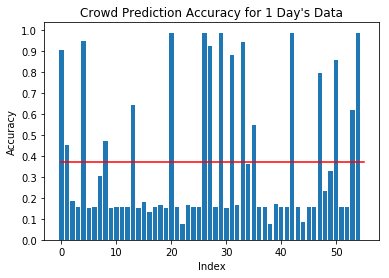

<Figure size 432x288 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(len(scores))
plt.bar(index, scores)
plt.xlabel('Index', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1)) 
plt.title("Crowd Prediction Accuracy for 1 Day's Data")
plt.plot([0, 55],[avg, avg], 'r')
plt.show()
plt.savefig("/Users/tanshi/SIP2019/results/1dayaccuracy.pdf")

In [328]:
os.chdir('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation')
filelist = []
for files in glob.glob("*.csv"):
    if (files == "wifi_location_u18.csv" or files == "wifi_location_u24.csv" or files == "wifi_location_u25.csv" or
       files == "wifi_location_u47.csv" or files == "wifi_location_u54.csv" or files == "wifi_location_u59.csv"):
        print
    else:
        print files
        filelist.append(files)
print len(filelist)



wifi_location_u00.csv
wifi_location_u01.csv
wifi_location_u02.csv
wifi_location_u03.csv
wifi_location_u04.csv
wifi_location_u05.csv
wifi_location_u07.csv
wifi_location_u08.csv
wifi_location_u09.csv
wifi_location_u10.csv
wifi_location_u13.csv
wifi_location_u14.csv
wifi_location_u15.csv
wifi_location_u16.csv
wifi_location_u17.csv

wifi_location_u19.csv
wifi_location_u20.csv
wifi_location_u22.csv
wifi_location_u23.csv


wifi_location_u27.csv
wifi_location_u30.csv
wifi_location_u31.csv
wifi_location_u32.csv
wifi_location_u33.csv
wifi_location_u34.csv
wifi_location_u35.csv
wifi_location_u36.csv
wifi_location_u41.csv
wifi_location_u43.csv
wifi_location_u45.csv
wifi_location_u46.csv

wifi_location_u49.csv
wifi_location_u50.csv
wifi_location_u51.csv
wifi_location_u52.csv
wifi_location_u53.csv

wifi_location_u56.csv
wifi_location_u57.csv
wifi_location_u58.csv

39


In [390]:
from datetime import datetime


curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=False)

start_indices = []
more_files = True
file_index = 1

while (more_files):
    for i in range(len(curr_file)):
        datetimeObj = datetime.strptime(curr_file['timestamp'][i], "%Y-%m-%d %H:%M:%S")
        if (datetimeObj.day == 28):
            if (datetimeObj.hour == 13):
                start_indices.append(i)
                break
    if (len(start_indices) == 39):
        more_files = False
        break
    else:
        dir = filelist[file_index]
        curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+dir, index_col=False)
        file_index += 1
        
        
print start_indices

#TAKE OUT 12, 39, 42, 44



[492, 1337, 885, 3168, 860, 514, 2593, 705, 574, 10034, 0, 1140, 642, 378, 385, 302, 733, 2736, 444, 1444, 1352, 8595, 962, 470, 1200, 215, 121, 231, 5211, 14575, 17310, 86, 38, 341, 7562, 1745, 1374, 2812, 912]


In [371]:
print start_indices

[492, 1337, 885, 3168, 860, 514, 2593, 705, 574, 10034, 0, 1140, 642, 378, 385, 302, 733, 2736, 444, 1444, 1352, 8595, 962, 470, 1200, 215, 121, 231, 5211, 14575, 17310, 86, 38, 341, 7562, 1745, 1374, 2812, 912]


In [388]:
my_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=False)
datetime_object1 = datetime.strptime(my_file['timestamp'][492], "%Y-%m-%d %H:%M:%S")
datetime_object1.day

28

In [421]:
loc_dict = {}
for x in locations:
    loc_dict.update({x : 0})
    
file_index = 0
#curr = filelist[file_index]
curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=False)
#print curr_file
#curr_file['time'] = curr_file['time'] - 14400
#curr_file['time'] = pd.to_datetime(curr_file['time'], unit = 's')
#print(curr_file['time'])


more_ids = True
curr_id = 0
y = start_indices[0]
time_contd = True
more_hours = True
index = 0
loc_dict_list = []
place_holder = 0
hour = 13
nextDay = False
day_list = []
day = 0

#loc_dict_list : list of dictionaries where each dictionary corresponds to one hour in the day
#list of loc_dict_lists: for all the days in the data set

    
from datetime import datetime

while(more_hours): 
    while(more_ids):
        #print curr_id
        while(time_contd):
            #if at beginning of time period
            if y == start_indices[file_index]:
                for i in range(len(locations)):
                    if (curr_file['location'][y] == locations[i]):
                        loc_dict[locations[i]] += 1
                y+=1
            else :
                #check if still in the same time period
                datetime_object1 = datetime.strptime(curr_file['timestamp'][y], "%Y-%m-%d %H:%M:%S")
                datetime_object2 = datetime.strptime(curr_file['timestamp'][y-1], "%Y-%m-%d %H:%M:%S")
                if (curr_id == 0):
                    day = datetime_object1.day
                if (datetime_object1.hour != datetime_object2.hour):
                    time_contd = False
                else:
                    #if user moves to new location within the period
                    if (curr_file['location'][y] != curr_file['location'][y-1]):
                        for i in range(len(locations)):
                            if (curr_file['location'][y] == locations[i]):
                                loc_dict[locations[i]] += 1
                    y+=1
        #one time period elapsed, moving on to next id            
        time_contd = True
        #if all uids checked for the time period, move on to next time period
        if (curr_id == 38):
            print curr_id
            start_indices[file_index] = y
            curr_id = 0
            file_index = 0
            print hour
            #index = place_holder
            y = start_indices[file_index]
            #add location and user dictionary for the period into list
            loc_dict_list.append(loc_dict)
            #reset dictionary to prepare for next time period
            loc_dict = {x: 0 for x in loc_dict}
            #if all time periods elapsed, stop
            datetime_object1 = datetime.strptime(curr_file['timestamp'][y], "%Y-%m-%d %H:%M:%S")
            #at the end of a period for all users ---> check if you're at the end of the day to go to the next day
            if (nextDay):
                print "hi"
                day_list.append(loc_dict_list)
                loc_dict_list = []
                #hour = 0
                nextDay = False
                #more_hours = False
                #more_ids = False
                if (day == 28):
                    print "test"
                    print curr_id
                    more_hours = False
                    more_ids = False
        else:
            #stay in same time period, move on to next uid
            if (curr_id == 0):
                if (hour == 22):
                    nextDay = True
                    hour = 0
                else:
                    hour += 1
                    if (hour == 22):
                        nextDay = True
                        hour = 0
            start_indices[file_index] = y
            curr_id += 1
            file_index+=1
            y = start_indices[file_index]
            dir = filelist[file_index]
            curr_file = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/'+dir, index_col=False)
#print loc_dict.values()

38
14
38
15
38
16
38
17
38
18
38
19
38
20
38
21
38
0
hi
test
0


In [401]:
print day_list[0][0]

{'near[reed; thornton; parkhurst; ]': 0, 'near[reed; wentworth; baker-berry; ]': 0, 'near[topliff; Mckenzie; sphinx; ]': 0, 'near[dewey; vail; remsen; ]': 0, 'near[butterfield; fahey-mclane; cummings; ]': 0, 'near[baker-berry; wentworth; websterhall; dartmouth_hall; ]': 0, 'near[massrow; robinson; hopkins; fairbanks; ]': 0, 'near[batrlett; newhamp; ]': 0, 'near[parkhurst; baker-berry; blunt_alumni_center; massrow; ]': 0, 'near[parkhurst; hanoverpsych; baker-berry; ]': 0, 'near[silsby-rocky; blunt_alumni_center; ]': 0, 'near[cummings; sanborn; ]': 0, 'near[hopkins; parkhurst; thornton; ]': 0, 'near[kemeny; north-main; fairchild; ]': 0, 'near[websterhall; sanborn; blunt_alumni_center; ]': 0, 'near[north-main; HanoverInn; remote_offices_HREAP; ]': 0, 'near[ripley; woodward; fayerweather; ]': 0, 'near[batrlett; fayerweather; Mckenzie; ]': 0, 'near[vail; lsb; remsen; ]': 0, 'near[mcnutt; baker-berry; parkhurst; ]': 0, 'near[massrow; gile; fairbanks; ]': 0, 'near[hopkins; east-wheelock; park

In [345]:
print loc_dict_list[60]

{'near[reed; thornton; parkhurst; ]': 0, 'near[dewey; vail; remsen; ]': 0, 'near[baker-berry; wentworth; websterhall; dartmouth_hall; ]': 0, 'near[batrlett; newhamp; ]': 0, 'near[parkhurst; baker-berry; blunt_alumni_center; massrow; ]': 0, 'near[silsby-rocky; blunt_alumni_center; ]': 0, 'near[hopkins; parkhurst; thornton; ]': 0, 'near[north-main; dana-library; moore; ]': 0, 'near[chasehall; buchanan; feldberg_library; ]': 0, 'near[batrlett; fayerweather; Mckenzie; ]': 0, 'near[vail; lsb; remsen; ]': 0, 'near[massrow; gile; fairbanks; ]': 0, 'near[hopkins; east-wheelock; parkhurst; ]': 0, 'near[blunt_alumni_center; silsby-rocky; butterfield; ]': 0, 'near[woodward; ripley; dartmouth_hall; ]': 0, 'near[lsb; vail; remsen; dana-library; ]': 0, 'near[east-wheelock; remote_offices_HREAP; hopkins; ]': 0, 'near[occum; aquinas; ]': 0, 'near[cutter-north; kemeny; little_hall; ]': 0, 'near[berry_sports_center; north-park; sport-venues; sport-venues-press; ]': 0, 'near[batrlett; woodward; sport-ven

In [ ]:
part_list = [['Period', 'Location', 'Count']]

for i in range(len(loc_dict_list)):
    for key in loc_dict_list[i]:
        part = []
        part.append(i)
        part.append(loc_dict_list[i].keys().index(key))
        #part.append(key)
        part.append(loc_dict_list[i][key])
        part_list.append(part)
print part_list[0]


'''part_list = [['Day', 'Period', 'Location', 'Count']]

day = 28
for i in range(len(day_list)):
    loc_dict_list = day_list[i]
    for j in range(len(loc_dict_list)):
        for key in loc_dict_list[j]:
            part = []
            part.append(day)
            part.append(i)
            part.append(loc_dict_list[j].keys().index(key))
            part.append(loc_dict_list[j][key])
            part_list.append(part)
    day += 1
print part_list[0]'''

import csv
csvData = part_list
with open('/Users/tanshi/SIP2019/Results/myCSV.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)
csvFile.close()

#for i in range(11):'''
    

'''dflist = []
df = pd.read_csv('/Users/tanshi/SIP2019/dataset/dataset/sensing/wifiLocation/wifi_location_u00.csv', index_col=None, header = 0)
#print df
dflist.append(df)
print dflist'''

'''gps = pd.concat(dflist)


data.to_csv('/Users/tanshi/SIP2019/results/locCrowding.csv', index = False'''



In [348]:
data=pd.read_csv('/Users/tanshi/SIP2019/Results/myCSV.csv')

column_train=['Period', 'Location']
column_target=['Count']

X=data[column_train]
Y=data[column_target]

In [351]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [368]:
from sklearn import svm
clf=svm.LinearSVC()

clf.fit(X_train,Y_train)
print clf

print clf.predict(X_test[0:100])

print clf.predict(X_test[0:1])

print clf.score(X_test,Y_test)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0]
0.9892381329837505


In [2]:
#DAY LIST--- currently only one day's worth of data
#day_list[i] = crowding data for all periods on day i
#day_list[i][j] = crowding data on day i, period j

part_list = [['Day', 'Period', 'Location', 'Count']]
per = 13

for i in range(len(day_list)):
    for j in range(len(day_list[i])):
        for key in day_list[i][j]:
            part = []
            part.append(i)
            part.append(per)
            part.append(day_list[i][j].keys().index(key))
            part.append(day_list[i][j][key])
            part_list.append(part)
        per += 1
print part_list[0]

NameError: name 'day_list' is not defined

In [1]:
import csv
csvData = part_list
with open('/Users/tanshi/SIP2019/Results/locCrowdData.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)
csvFile.close()

NameError: name 'part_list' is not defined

In [73]:
data=pd.read_csv('/Users/tanshi/SIP2019/Results/locCrowdData.csv')

column_train=['Day', 'Period', 'Location']
column_target=['Count']

X=data[column_train]
Y=data[column_target]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [7]:
from sklearn import svm
clf=svm.LinearSVC()

clf.fit(X_train,Y_train)
print clf

print clf.predict(X_test[0:100])

print clf.predict(X_test[0:1])

print clf.score(X_test,Y_test)


/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0]
0.9910013134728782


/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
from sklearn import svm
clf=svm.LinearSVC()

new_scores = [];
for i in range(55):
    clf.fit(X_train,Y_train)
    new_scores.append(clf.score(X_test,Y_test))

In [81]:
score = 0.9910013134728782
while (score == 0.9910013134728782):
    clf.fit(X_train,Y_train)
    score = clf.score(X_test,Y_test)

KeyboardInterrupt: 

In [76]:
for i in new_scores:
    print i
print len(new_scores)

0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134728782
0.9910013134

In [77]:
new_avg = np.mean(new_scores)
print new_avg

0.9910013134728783


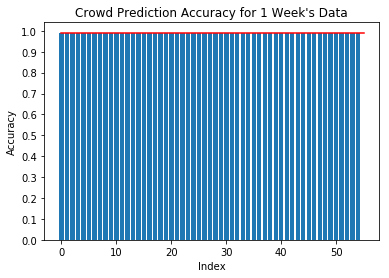

In [78]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(len(scores))
plt.bar(index, new_scores)
plt.xlabel('Index', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1)) 
plt.title("Crowd Prediction Accuracy for 1 Week's Data")
plt.plot([0, 55],[new_avg, new_avg], 'r')
plt.show()

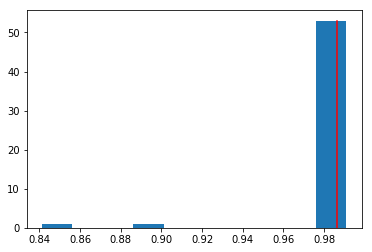

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(scores)
plt.plot([avg, avg], [0,53], 'r')
plt.show()

In [ ]:
import pymysql

dbServerName = "127.0.0.1"
dbUser = "root"
dbPassword = "mypassword"
dbName = "db1"
charSet = "utf8mb4"
cusrorType = pymysql.cursors.DictCursor

connectionObject = pymysql.connect(host=dbServerName, user=dbUser, db=dbName, password=dbPassword, charset=charSet,cursorclass=cusrorType)

try:
    # Create a cursor object
    cursorObject = connectionObject.cursor()                                     
    
    periodCount = 11
    
    sqlQuery = "ALTER TABLE studentLife MODIFY COLUMN locations VARCHAR(100)";
    cursorObject.execute(sqlQuery)
    
    for i in range(len(day_list[0])):
        for j in locations:
            print j
            per = str(periodCount)
            loc = str(day_list[0][j])
            crowd = str(crowd_dict_list[i][j])
            #sqlQuery = "INSERT INTO studentLife (period, locations, count, crowding) VALUES ('$per', '$j', '$loc', '$crowd')";
            
            #sqlQuery = "INSERT INTO studentLife (period, locations, count, crowding) VALUES (\'" + per + "\', \'" + j + ", " + loc + ", " + crowd + ")";
            
            sqlQuery = "INSERT INTO studentLife (period, locations, count, crowding) VALUES (%s, %s, %s, %s)";
            
            values = (per, j, loc, crowd)
            
            print sqlQuery
            cursorObject.execute(sqlQuery, values)
            periodCount += 1
       
    sqlQuery = "SELECT * from studentLife"
    cursorObject.execute(sqlQuery)
    
    rows = cursorObject.fetchall()

    for row in rows:
        print(row)

except Exception as e:
    print("Exeception occured:{}".format(e))
    
finally:
    connectionObject.close()


    
    